In [7]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import itertools

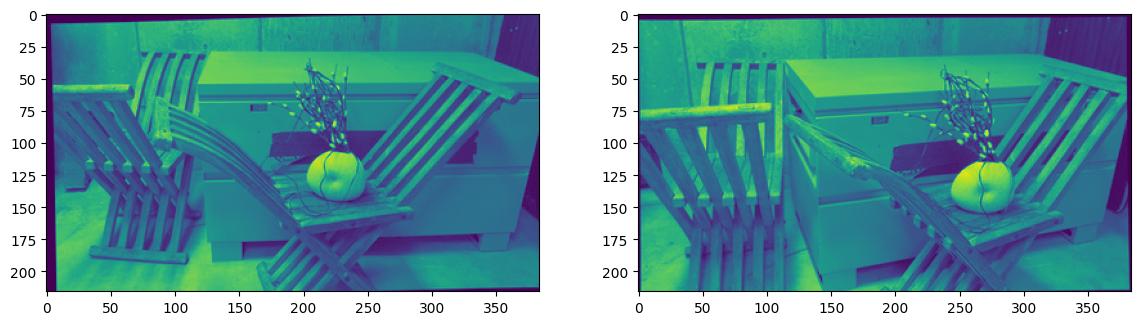

In [8]:
img1=cv.imread(r"D:\Journey\CV\Coding_assignments\Disparity Algorithm\data\curucle\im1.jpg",cv.IMREAD_GRAYSCALE)
img2=cv.imread(r"D:\Journey\CV\Coding_assignments\Disparity Algorithm\data\curucle\im2.jpg",cv.IMREAD_GRAYSCALE)
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)

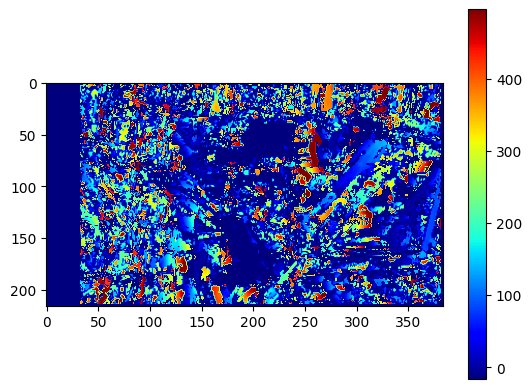

In [14]:
algo=cv.StereoBM.create(numDisparities=32,blockSize=5)
disparity=algo.compute(img1,img2)
cv.imwrite("disparity.png",disparity)
plt.figure()
plt.imshow(disparity,cmap='jet')
plt.colorbar(cmap='jet')

In [10]:
nrows, ncols = disparity.shape
disparity = disparity.reshape(-1, nrows * ncols)
# filtering invalid disparities (-1)
# setting up row, col vectors

yx = list(itertools.product(range(nrows), range(ncols)))

x, y = list(zip(*yx))
x = np.array(x).reshape(-1, nrows*ncols)
y = np.array(y).reshape(-1, nrows*ncols)

mask = disparity > 0
disparity = disparity[mask] * 0.1

x = x[mask]
y = y[mask]
# Converting disparities to point cloud

baseline = 0.1
focal_length = 150

zw = (baseline * focal_length) / disparity

cx = ncols / 2
cy = nrows / 2

xw = (x - cx) * zw / focal_length
yw = (y - cy) * zw / focal_length

data = np.stack([-xw, yw, zw], axis=0).T
np.savetxt('point.asc', data)